# Rt Live Model

In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import pandas as pd
import numpy as np
import arviz as az
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from matplotlib import pyplot as plt
from covid.models.generative import GenerativeModel
from covid.data import summarize_inference_data
%config InlineBackend.figure_format = 'retina'

from covid.data import get_and_process_covidtracking_data_il, get_and_process_covidtracking_data_ilsev, summarize_inference_data

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-3irbvhjy because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Fetch data and select the state's data

In [2]:
df = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today())#-pd.Timedelta(days=1))
dfunn = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today(), norm=False)#-pd.Timedelta(days=1))
dfsev = get_and_process_covidtracking_data_ilsev(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))

In [3]:
region = "Israel"
model_data = df.loc[region]
model_sev = dfsev.loc[region]
model_unn = dfunn.loc[region]

## Create the model instance and sample

In [4]:
gmsev = GenerativeModel(region, model_sev, buffer_days = 20, delay=5+5)
gmsev.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 3338 seconds.


In [5]:
gm = GenerativeModel(region, model_data, delay=5)
gm.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 3266 seconds.


In [6]:
gmunn = GenerativeModel(region, model_unn, delay=2)
gmunn.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 3432 seconds.


## Summarize Model Output

In [7]:
result = summarize_inference_data(gm.inference_data)
resultsev = summarize_inference_data(gmsev.inference_data)
resultunn = summarize_inference_data(gmunn.inference_data)

In [8]:
result.tail(60)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-08-29,1.125929,1.125355,1.044068,1.197104,2509.798367,2025.516597,2360.166413,910,10171
2020-08-30,1.126980,1.125148,1.047515,1.197152,2569.082792,2058.285717,2253.270076,1103,12913
2020-08-31,1.126769,1.126310,1.049170,1.207921,2629.588316,2093.752829,1874.346061,2178,30653
2020-09-01,1.123608,1.123273,1.034364,1.189132,2691.647238,2131.811656,2158.349270,2252,27524
2020-09-02,1.121072,1.116732,1.040501,1.199928,2755.297056,2172.373259,2435.995582,3193,34577
2020-09-03,1.118653,1.115096,1.037286,1.187472,2819.548797,2215.352721,2065.851828,2661,33979
2020-09-04,1.112677,1.110258,1.029005,1.183552,2883.733663,2260.656523,2251.062598,2623,30738
2020-09-05,1.105097,1.100399,1.023443,1.179816,2947.840125,2308.168680,2596.193739,1505,15292
2020-09-06,1.095299,1.090846,1.014905,1.167491,3010.917779,2357.755913,3065.504460,2176,18725


In [9]:
resultunn.tail(60)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-08-29,1.314573,1.310205,1.220385,1.407803,3036.010613,2056.527502,910.0,910,100000
2020-08-30,1.309601,1.305496,1.200643,1.390422,3210.328883,2147.495399,1103.0,1103,100000
2020-08-31,1.301219,1.299966,1.215474,1.398152,3392.949547,2247.233680,2178.0,2178,100000
2020-09-01,1.292054,1.294062,1.201335,1.380533,3582.674420,2356.075588,2252.0,2252,100000
2020-09-02,1.279582,1.281982,1.171620,1.358904,3778.584161,2474.278257,3193.0,3193,100000
2020-09-03,1.263480,1.260462,1.177593,1.357147,3979.376316,2601.920204,2661.0,2661,100000
2020-09-04,1.243961,1.244427,1.159146,1.334634,4182.992646,2738.888580,2623.0,2623,100000
2020-09-05,1.222083,1.222352,1.123845,1.302943,4386.272980,2884.913857,1505.0,1505,100000
2020-09-06,1.197932,1.199372,1.106267,1.278356,4585.490551,3039.579335,2176.0,2176,100000


In [10]:
resultsev.tail(30)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-09-27,0.752606,0.749342,0.680264,0.816237,68.695471,104.452965,124.0,124.0,10000
2020-09-28,0.746561,0.744091,0.681306,0.820890,65.292857,104.945567,93.0,93.0,10000
2020-09-29,0.741787,0.737500,0.663391,0.803320,61.959360,105.061379,133.0,133.0,10000
2020-09-30,0.738817,0.736855,0.665349,0.814574,58.710923,104.793486,127.0,127.0,10000
2020-10-01,0.737026,0.735393,0.656542,0.810806,55.565119,104.143864,125.0,125.0,10000
2020-10-02,0.733899,0.732396,0.656074,0.815728,52.543107,103.123442,105.0,105.0,10000
2020-10-03,0.731177,0.730547,0.637177,0.809261,49.660374,101.749391,89.0,89.0,10000
2020-10-04,0.731653,0.730407,0.631792,0.817514,46.913143,100.043577,139.0,139.0,10000
2020-10-05,0.731336,0.733275,0.633091,0.825632,44.294837,98.033560,119.0,119.0,10000


## Plot Model Output

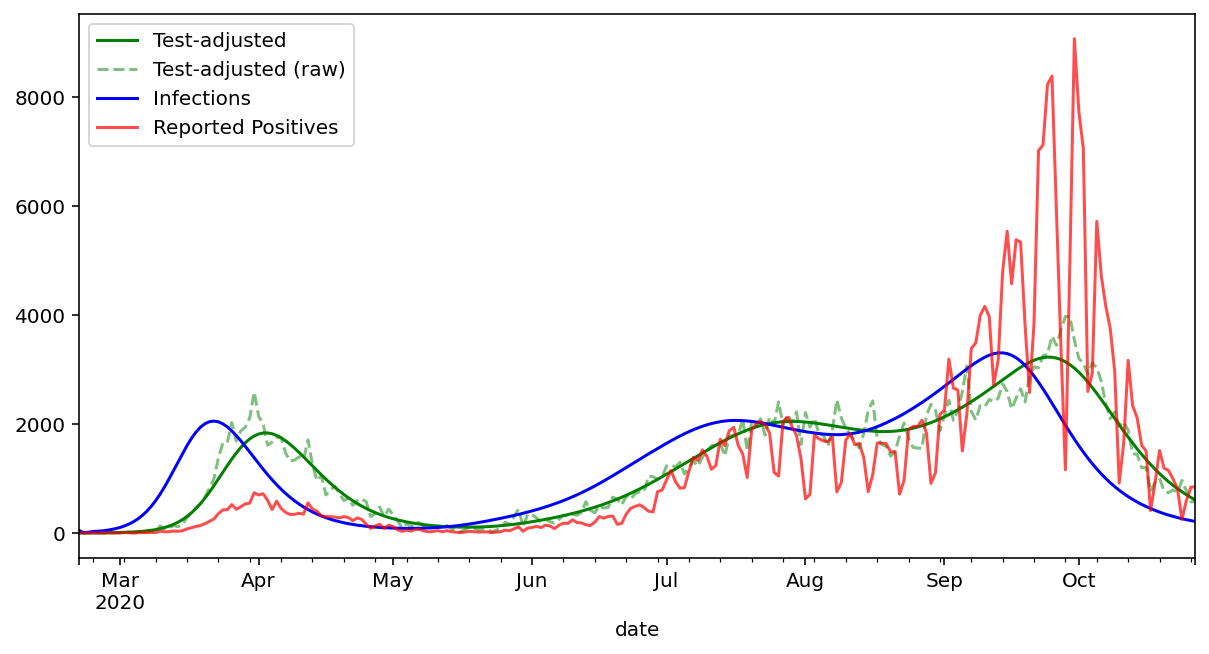

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
result.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result.infections.plot(c="b", label="Infections")
gm.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

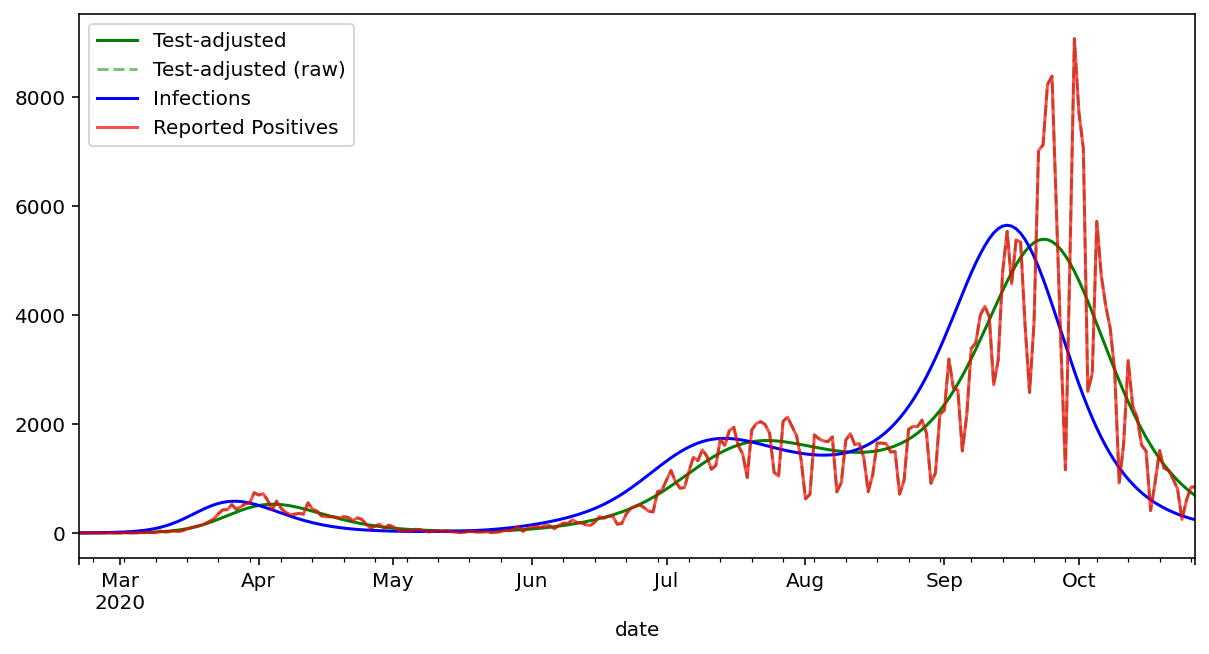

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
resultunn.test_adjusted_positive.plot(c="g", label="Test-adjusted")
resultunn.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
resultunn.infections.plot(c="b", label="Infections")
gmunn.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

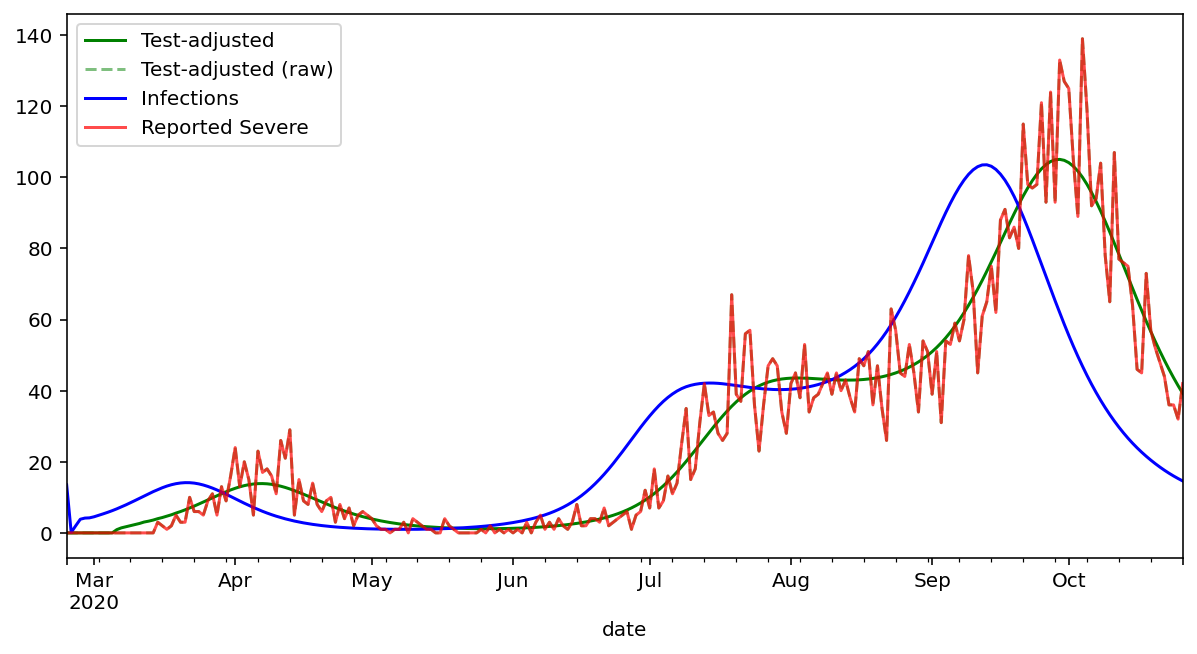

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
resultsev.test_adjusted_positive.plot(c="g", label="Test-adjusted")
resultsev.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
resultsev.infections.plot(c="b", label="Infections")
gmsev.observed.positive.plot(c='r', alpha=.7, label="Reported Severe")
fig.set_facecolor('w')
ax.legend();

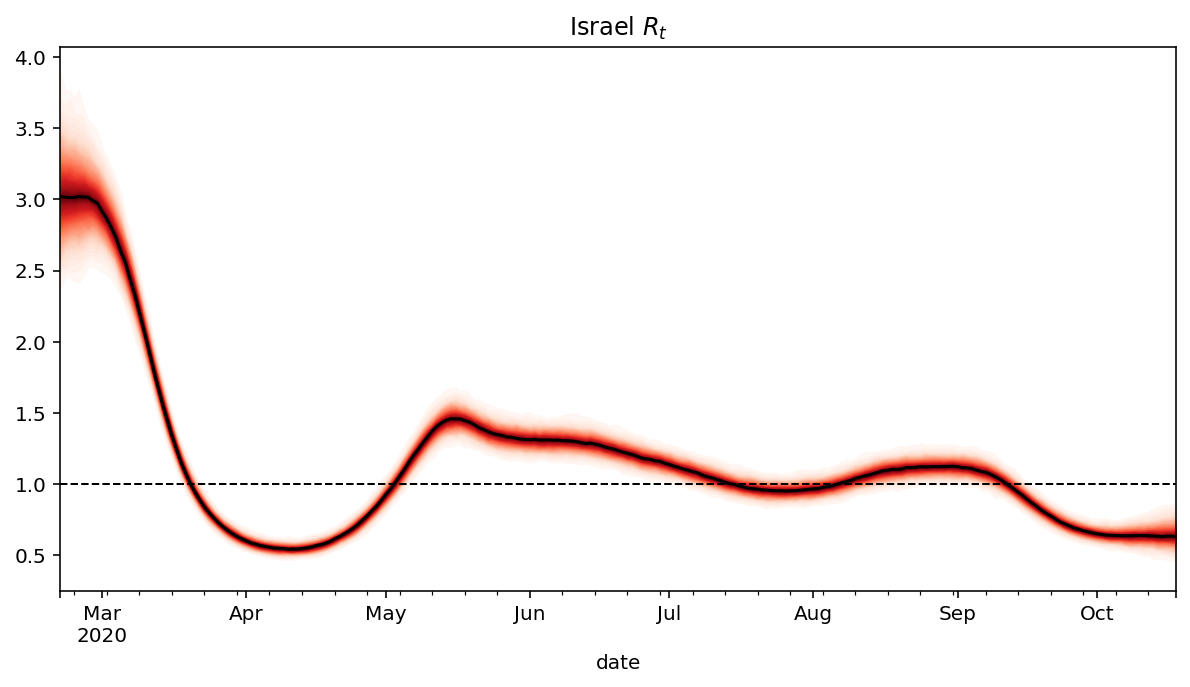

In [14]:
#plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$")
samples = gm.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_xlim(left = pd.Timestamp.today()-pd.Timedelta(days=70), right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_ylim(top = 2)
fig.set_facecolor('w')

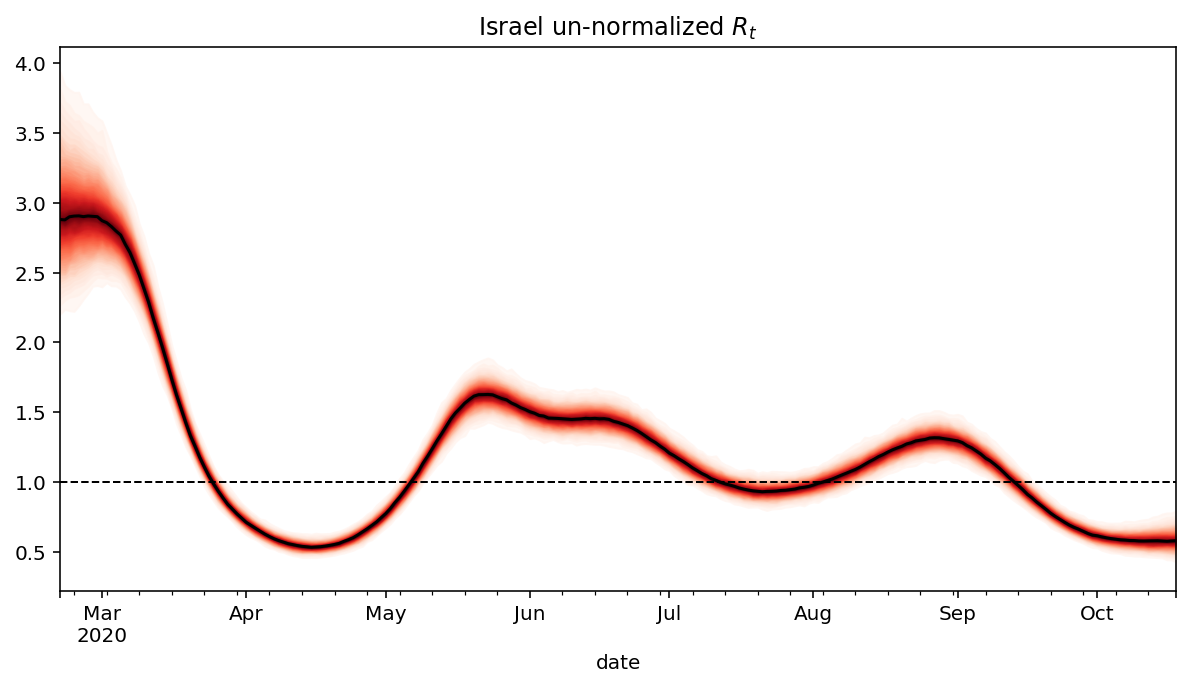

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} un-normalized $R_t$")
samples = gmunn.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

resultunn["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_xlim(left = pd.Timestamp.today()-pd.Timedelta(days=70), right=pd.Timestamp.today()-pd.Timedelta(days=10))
#ax.set_ylim(top = 2)
fig.set_facecolor('w')

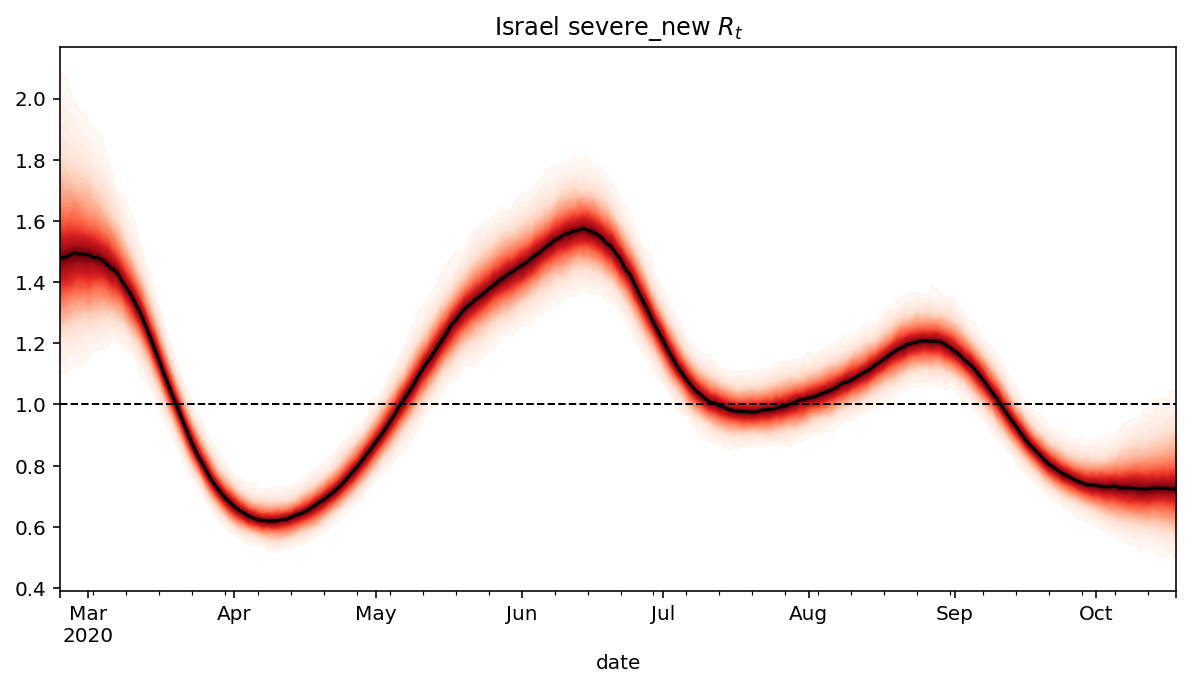

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} severe_new $R_t$")
samples = gmsev.trace['r_t']
x=resultsev.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

resultsev["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
fig.set_facecolor('w')